<a href="https://colab.research.google.com/github/jhteles/rsi_example/blob/main/RSI_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## Main

In [15]:
# Load the data into a dataframe
symbol = yf.Ticker('BTC-USD')
df_btc = symbol.history(interval="1h",period="max")

# Filter the data by date
df_btc = df_btc[df_btc.index > pd.Timestamp(2025, 1, 10, 0, tz='UTC')]
#df_btc = df_btc[df_btc.index < pd.Timestamp(2025, 1, 13, 0, tz='UTC')]   {use this if you want a specific end date}
df_btc = df_btc[df_btc.index < pd.Timestamp.now(tz='UTC')]

# Print the result
print(df_btc)

                                    Open           High            Low  \
Datetime                                                                 
2025-01-10 01:00:00+00:00   92739.273438   93114.132812   92619.085938   
2025-01-10 02:00:00+00:00   93097.398438   93607.539062   93051.796875   
2025-01-10 03:00:00+00:00   93373.281250   93696.375000   93370.078125   
2025-01-10 04:00:00+00:00   93701.765625   93851.000000   93512.585938   
2025-01-10 05:00:00+00:00   93828.257812   94180.320312   93677.789062   
...                                  ...            ...            ...   
2025-01-17 13:00:00+00:00  102743.312500  102899.609375  102440.085938   
2025-01-17 14:00:00+00:00  102498.554688  103265.359375  102449.781250   
2025-01-17 15:00:00+00:00  103379.804688  104241.929688  103344.414062   
2025-01-17 16:00:00+00:00  103984.296875  105012.125000  103921.195312   
2025-01-17 17:00:00+00:00  105008.101562  105198.320312  104765.171875   

                                   Cl

In [16]:
# Delete unnecessary columns
del df_btc["Dividends"]
del df_btc["Stock Splits"]

In [17]:
change = df_btc["Close"].diff()
change.dropna(inplace=True)

In [18]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

#
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [19]:
rsi = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
rsi.head(20)

,Close
Datetime,
2025-01-10 02:00:00+00:00,NaN
2025-01-10 03:00:00+00:00,NaN
2025-01-10 04:00:00+00:00,NaN
2025-01-10 05:00:00+00:00,NaN
2025-01-10 06:00:00+00:00,NaN
2025-01-10 07:00:00+00:00,NaN
2025-01-10 08:00:00+00:00,NaN
2025-01-10 09:00:00+00:00,NaN
2025-01-10 10:00:00+00:00,NaN


## Chart

In [20]:
# Set the theme of our chart
plt.style.use('fivethirtyeight')

# Make our resulting figure much bigger
plt.rcParams['figure.figsize'] = (20, 20)

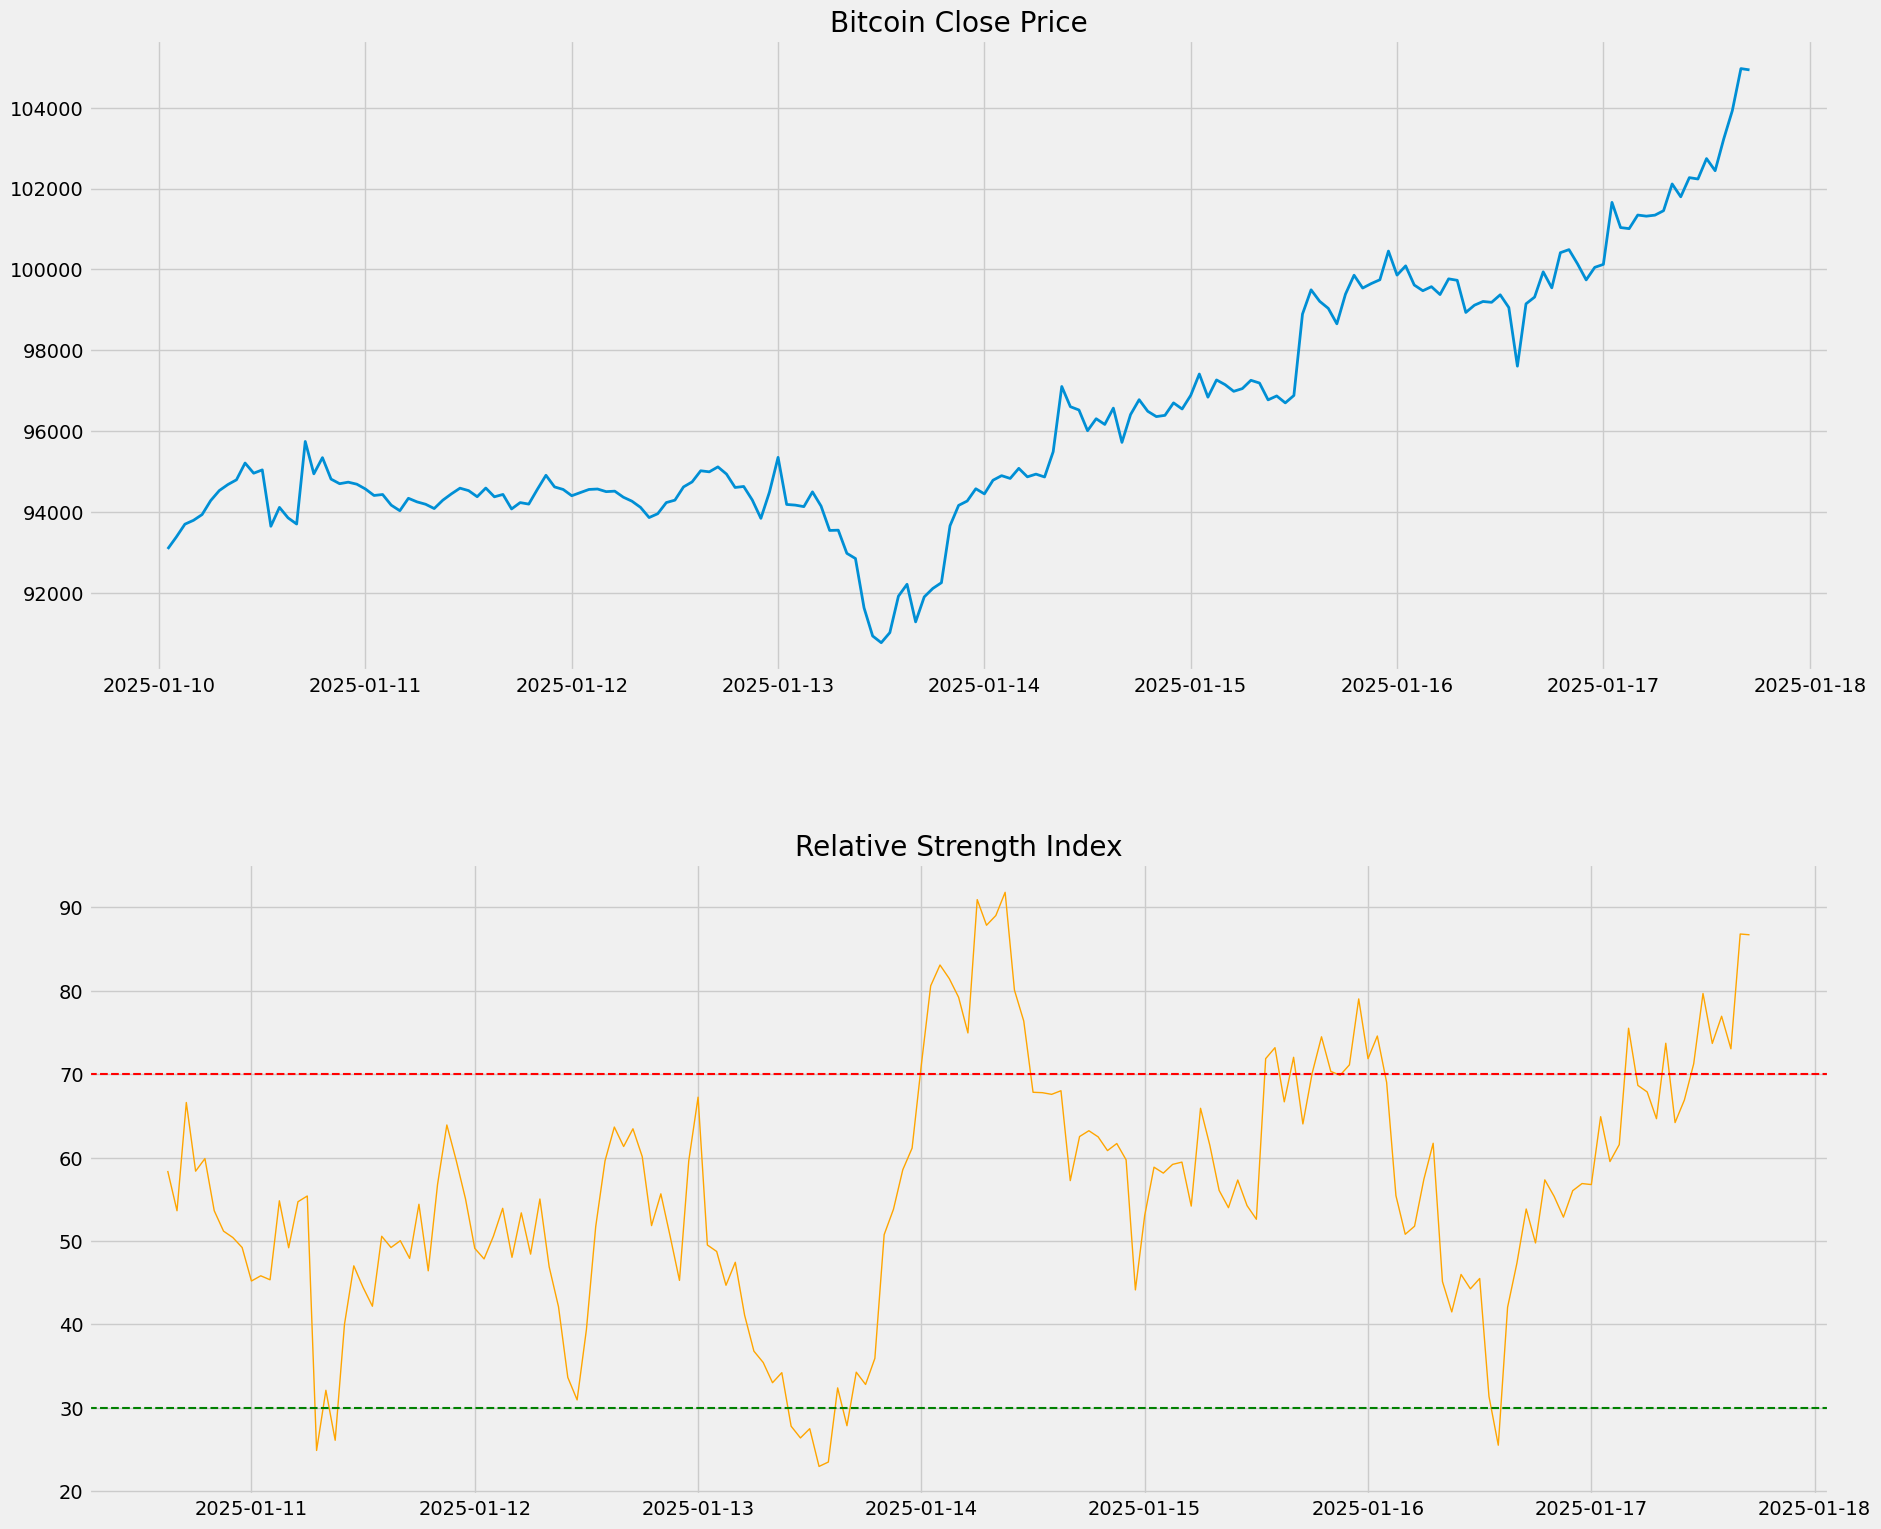

In [21]:
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df_btc['Close'], linewidth=2)
ax1.set_title('Bitcoin Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

In [22]:
# Display the charts
plt.show()

## Interactive Chart

In [23]:
# Same as the chart above, but interactive and the rsi in a separated chart below the main chart

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03,
                    subplot_titles=('Bitcoin Close Price', 'Relative Strength Index'))

# Add the first trace (Bitcoin Close Price)
fig.add_trace(go.Scatter(x=df_btc.index, y=df_btc['Close'],
                         mode='lines', name='Bitcoin Close Price',
                         line=dict(width=2)), row=1, col=1)

# Add the second trace (RSI) to the second subplot
fig.add_trace(go.Scatter(x=rsi.index, y=rsi,
                         mode='lines', name='RSI',
                         line=dict(color='orange', width=1)), row=2, col=1)

# Add horizontal lines for overbought/oversold levels to the second subplot
fig.add_trace(go.Scatter(x=rsi.index, y=[70]*len(rsi.index), mode='lines',
                         name='Overbought (70)', line=dict(color='red', width=1.5, dash='dash')), row=2, col=1)

fig.add_trace(go.Scatter(x=rsi.index, y=[30]*len(rsi.index), mode='lines',
                         name='Oversold (30)', line=dict(color='green', width=1.5, dash='dash')), row=2, col=1)


# Update layout
fig.update_layout(height=800, width=1000, title_text="Bitcoin Close Price and RSI")
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="RSI", row=2, col=1)

# Show the plot
fig.show()